In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('../Data/AmesHousing.csv')

# See the first 5 rows
print(df.head())

# Check the shape (How many houses? How many features?)
print(f"Dataset shape: {df.shape}")

# See the column names
print(df.columns)
print(df.shape)

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [2]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [3]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values>0])

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Total Bsmt SF        1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Area          1
Garage Cars          1
Bsmt Unf SF          1
Electrical           1
dtype: int64


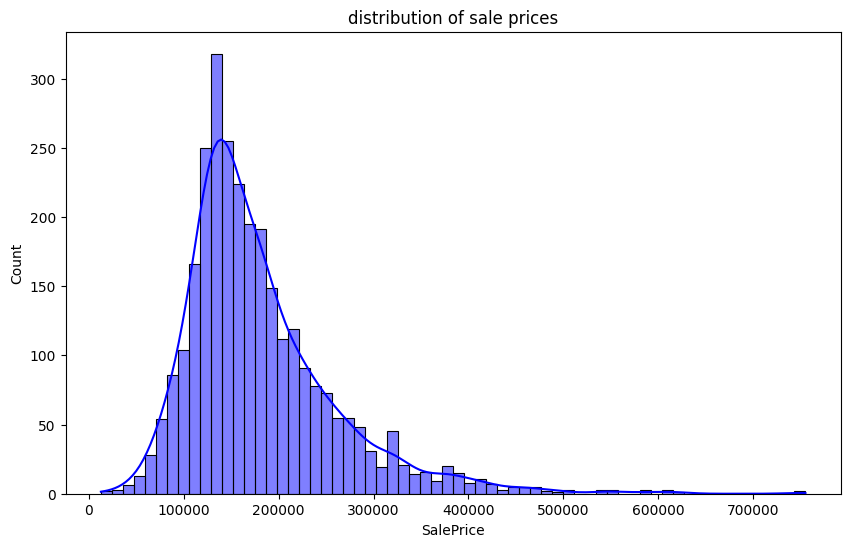

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns

plt.figure(figsize = (10,6))
sns.histplot(df['SalePrice'], kde=True , color='blue')
plt.title('distribution of sale prices')
plt.show()

## Analysis of Histogram..

- **Right Skewness**: The "tail" of the graph stretches far to the right. This means most houses are in the $100k to $200k range, but there are a few very expensive "luxury" houses ($500k+) pulling the average up.

- **The Problem**: Most machine learning models (like Linear Regression) assume that data is Normally Distributed (a perfect bell shape). Since the data is skewed, the model might struggle to predict the price of those very expensive houses accurately.

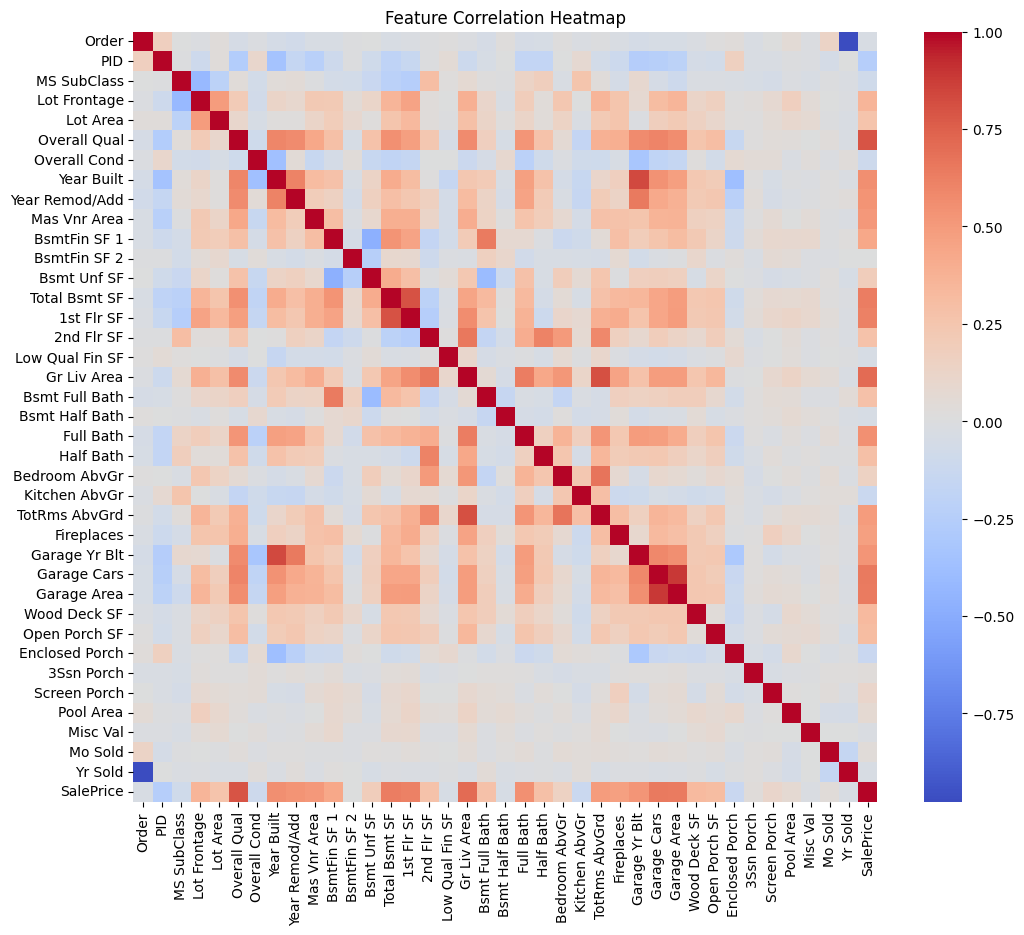

In [5]:
numeric_col = df.select_dtypes(include=['number'])
plt.figure(figsize=(12,10))
sns.heatmap(numeric_col.corr(),cmap='coolwarm' , annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [6]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values>0].sort_values(ascending=False)
percent_missing = (missing_values/len(df))*100
print("percentage of missing data : ", percent_missing)

percentage of missing data :  Pool QC           99.556314
Misc Feature      96.382253
Alley             93.242321
Fence             80.477816
Mas Vnr Type      60.580205
Fireplace Qu      48.532423
Lot Frontage      16.723549
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Garage Finish      5.426621
Garage Type        5.358362
Bsmt Exposure      2.832765
BsmtFin Type 2     2.764505
Bsmt Cond          2.730375
Bsmt Qual          2.730375
BsmtFin Type 1     2.730375
Mas Vnr Area       0.784983
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
BsmtFin SF 1       0.034130
BsmtFin SF 2       0.034130
Electrical         0.034130
Total Bsmt SF      0.034130
Bsmt Unf SF        0.034130
Garage Area        0.034130
Garage Cars        0.034130
dtype: float64


## Analysis of Missing Data

- **Delete Group** : the percentage above 80 shows that almost data is missing . therefore completely dropping that entire column is meaningful.
- **Contextual Group** : Fireplace Qu (~48%), Garage Type/Finish/Qual/Cond (~5%), Bsmt Exposure/Qual/Cond (~2%) . **Analysis**: These aren't actually "missing" in the sense of an error. If a house doesn't have a garage or a basement, the value is NaN (Not a Number). **Action**: We will fill these with the string "None" to tell the model that the feature simply doesn't exist for that house.
- **Numerical Imputation** : Lot Frontage (~16%), Mas Vnr Area (~0.7%). **Analysis**: Every house has a lot frontage (the area of the lot touching the street). We can't just say "None.". **Action**: We will fill these with the Median value of the dataset.

In [7]:
# Delete Group

cols_to_drop = ['Pool QC', 'Misc Feature', 'Alley', 'Fence']
df = df.drop(columns=cols_to_drop)

In [8]:
df.shape

(2930, 78)

In [9]:
#Contextual Group

none_cols = ['Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 
             'Garage Cond', 'Bsmt Exposure', 'BsmtFin Type 2', 
             'Bsmt Cond', 'Bsmt Qual', 'BsmtFin Type 1', 'Mas Vnr Type']

for col in none_cols:
    df[col] = df[col].fillna('None')

In [10]:
#Numerical Imputation

df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].median())
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [11]:
print(df.isnull().sum().max())
df.shape

159


(2930, 78)

In [12]:
remaining_missing = df.isnull().sum()
print(remaining_missing[remaining_missing > 0])

BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Electrical          1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     159
Garage Cars         1
Garage Area         1
dtype: int64


In [13]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Year Built'])

cols_to_zero = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
                'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']

for col in cols_to_zero:
    df[col] = df[col].fillna(0)

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [14]:
print(df.isnull().sum().max())

0


## Handling Non-numerical Data

- We have many columns like Neighborhood, Foundation, and House Style that are full of words.
- We need to use One-Hot Encoding. This creates a new column for every unique category. For example, if a Foundation is "Brick," it gets a 1 in the Foundation_Poured_Concrete column and a 0 elsewhere.

In [15]:
import pandas as pd 
from sklearn.model_selection import train_test_split

df_final = pd.get_dummies(df , drop_first=True)
print(df_final)

      Order        PID  MS SubClass  Lot Frontage  Lot Area  Overall Qual  \
0         1  526301100           20         141.0     31770             6   
1         2  526350040           20          80.0     11622             5   
2         3  526351010           20          81.0     14267             6   
3         4  526353030           20          93.0     11160             7   
4         5  527105010           60          74.0     13830             5   
...     ...        ...          ...           ...       ...           ...   
2925   2926  923275080           80          37.0      7937             6   
2926   2927  923276100           20          68.0      8885             5   
2927   2928  923400125           85          62.0     10441             5   
2928   2929  924100070           20          77.0     10010             5   
2929   2930  924151050           60          74.0      9627             7   

      Overall Cond  Year Built  Year Remod/Add  Mas Vnr Area  ...  \
0     

In [16]:
X = df_final.drop('SalePrice' , axis=1)
y = df_final['SalePrice']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")

Training features shape: (2344, 262)
Test features shape: (586, 262)


# Training & Beating the Baseline 

Now that the features are ready, let's train a simple Linear Regression model first to set a baseline. Then, we will immediately try to beat it with a more powerful Random Forest Regressor, which is much better at handling the complex relationships in housing data.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score , mean_absolute_error

lr = LinearRegression()
lr.fit(X_train , y_train)
lr_preds = lr.predict(X_test)
print(f"Linear Regression R2: {r2_score(y_test, lr_preds):.4f}")

rf = RandomForestRegressor(n_estimators=100 , random_state=42)
rf.fit(X_train , y_train)
rf_preds = rf.predict(X_test)
print(f"Random forest  Regressor R2: {r2_score(y_test, rf_preds):.4f}")


Linear Regression R2: 0.8952
Random forest  Regressor R2: 0.9127


 # Analysis of The Results
 
 - Linear Regression **(R^2 = 0.8952)**: This baseline is already quite high. It shows that our data cleaning and the log transformation we did earlier were very effective.
 
 - Random Forest **(R^2 = 0.9127)**: The "win" here is significant. Because Random Forest is an ensemble of many decision trees, it's better at picking up on complex, non-linear patterns—like how the value of "Extra Space" might be much higher in a premium neighborhood than in a standard one.

# Final Visualization: Predictions vs. Reality

To really "seal the deal" for this project , we  need a visualization that proves the model works. We'll plot the Actual Prices against the Predicted Prices. In a perfect world, these would form a straight diagonal line.

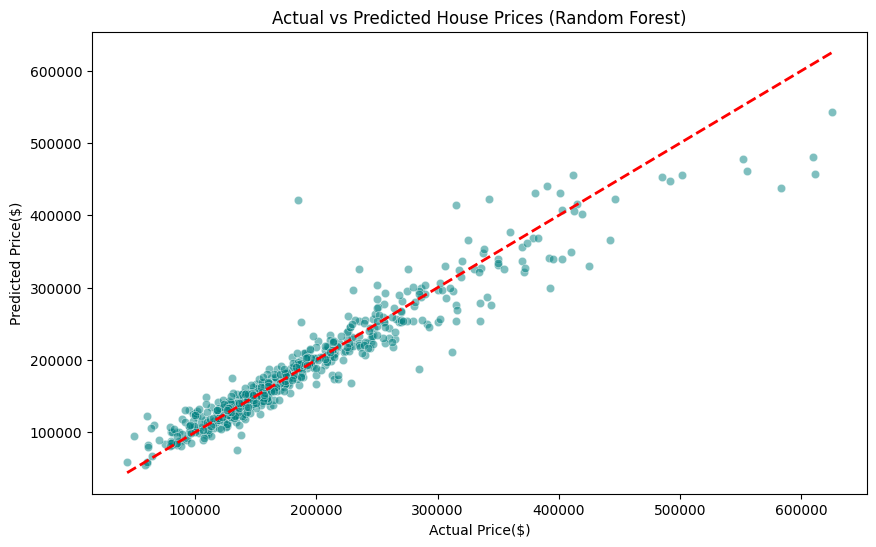

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.figure(figsize=(10,6))
sns.scatterplot(x = y_test , y= rf_preds, alpha = 0.5 , color='teal')
plt.plot([y_test.min(), y_test.max()] ,[y_test.min(), y_test.max()] , color='red' , lw=2 , linestyle = '--')

plt.xlabel('Actual Price($)')
plt.ylabel('Predicted Price($)')
plt.title('Actual vs Predicted House Prices (Random Forest)')
plt.show()